In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-27 14:16:41.049346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone14Pro_I(ii) dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone14Pro_I_Validate/iPhone14_pro_I(ii)/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0078125+0.0078125j 0.03125  -0.0078125j 0.015625 +0.0078125j ...
 0.015625 +0.015625j  0.015625 +0.j        0.03125  -0.0078125j]
2048
84337
(2048, 84337)
[0.02120258 0.01093484 0.00379057 ... 0.00193539 0.0039011  0.01052333]
0
(10000, 2048)
(10000,)
[0.015625 +0.j        0.0234375+0.0078125j 0.0078125+0.j        ...
 0.0078125-0.0078125j 0.0234375+0.015625j  0.015625 +0.0078125j]
2048
83238
(2048, 83238)
[0.01855624 0.00968533 0.00359719 ... 0.00189885 0.00373283 0.00970302]
1
(20000, 2048)
(20000,)
[0.015625 +0.0078125j 0.015625 +0.0078125j 0.       +0.0078125j ...
 0.0234375+0.0078125j 0.015625 +0.0078125j 0.015625 +0.015625j ]
2048
80509
(2048, 80509)
[0.01902401 0.0098836  0.00327027 ... 0.00165634 0.00325221 0.00979596]
2
(30000, 2048)
(30000,)
[0.       +0.0078125j 0.03125  +0.j        0.015625 +0.03125j   ...
 0.015625 -0.0078125j 0.0234375+0.015625j  0.0078125+0.j       ]
2048
85214
(2048, 85214)
[0.01858882 0.00984553 0.00361264 ... 0.00206463 0.00381185 0.00977849]
3
(40

## Cross-model Validation

## iPhone14Pro_I(i) model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(i)_model.h5")
model.summary()

2023-02-27 14:25:44.344751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 6.5114 - accuracy: 0.1248
test loss, test acc: [6.511378288269043, 0.12482000142335892]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[2298  351 2396 2078    3    0  188 2259  132  295]
 [1558  788 2357 1114   12    0  477 2569  495  630]
 [ 539 2246 1178  275   17    1 1019 1020 1592 2113]
 [   1  732   45    0    0  367 3739   18 1238 3860]
 [ 457 2192  960  425   25    6 1389 1207 1498 1841]
 [ 415 2140 1337  175   11    1 1009  812 1911 2189]
 [ 505 1847 1210  202   15    3  911  719 2173 2415]
 [3092  197 1762 1425    3    0  116 2901  118  386]
 [1704  553 2110 1267   10    0  616 2456  476  808]
 [  21 1758  134   98    0  262 2367  255 1201 3904]]
              precision    recall  f1-score   support

           0       0.22      0.23      0.22     10000
           1       0.06      0.08      0.07     10000
           2       0.09      0.12      0.10     10000
           3       0.00      0.00      0.00     10000
           4       0.26      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.08      0.0

Test Accuracy:0.12482


Text(0.5, 1.0, 'Accuracy:0.125')

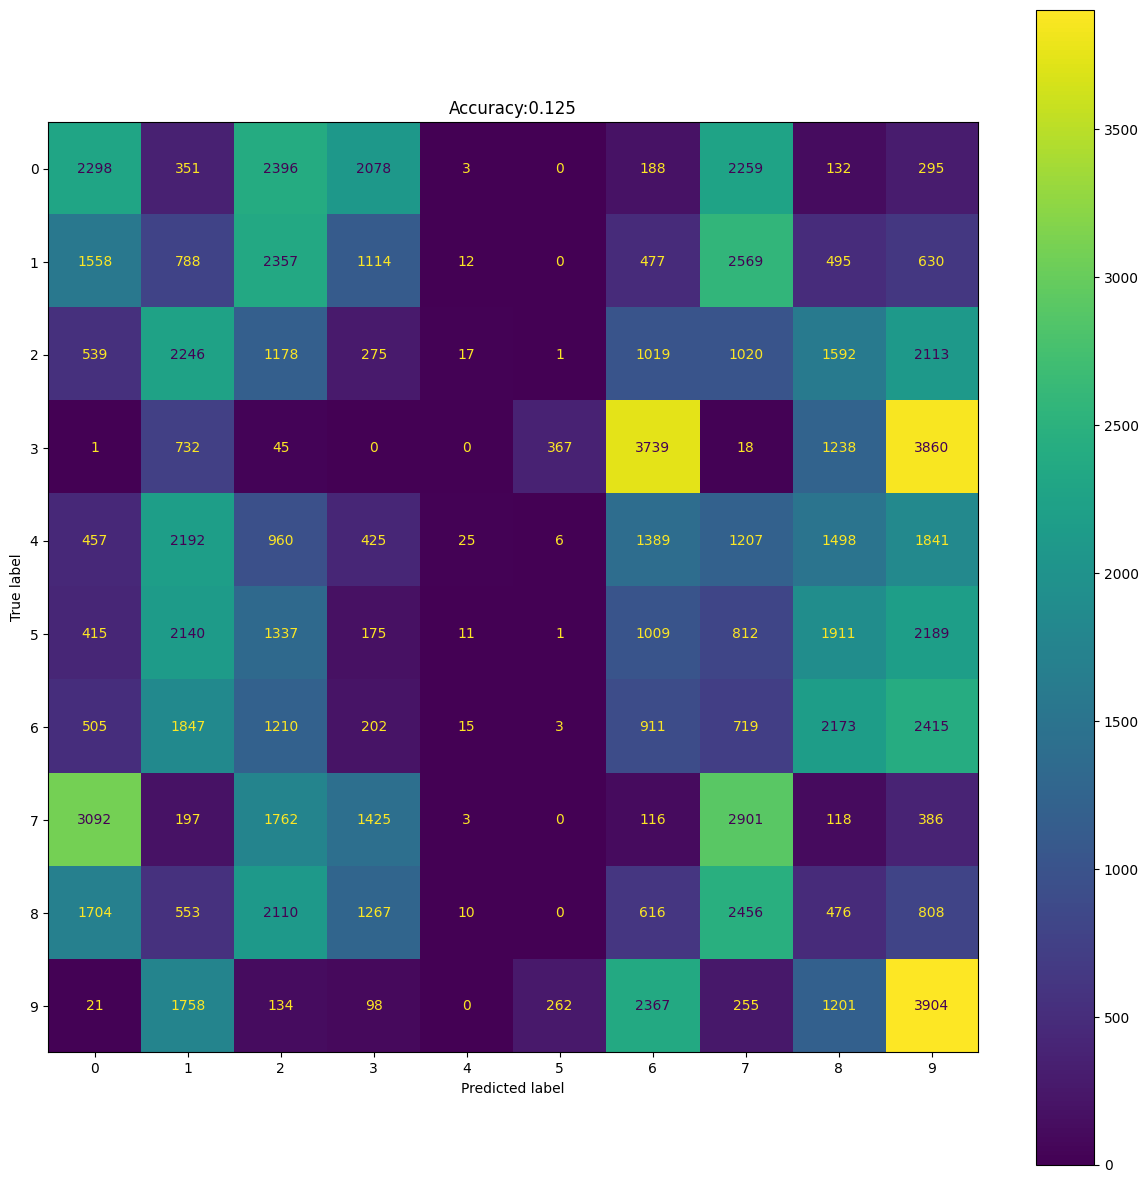

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [10]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 4ms/step - loss: 1.5472 - accuracy: 0.3969
Epoch 2/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.5460 - accuracy: 0.3976
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5445 - accuracy: 0.3982
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5430 - accuracy: 0.3994
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5416 - accuracy: 0.3997
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5406 - accuracy: 0.4014
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5392 - accuracy: 0.4019
Epoch 8/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5379 - accuracy: 0.4014
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5366 - accuracy: 0.4039
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

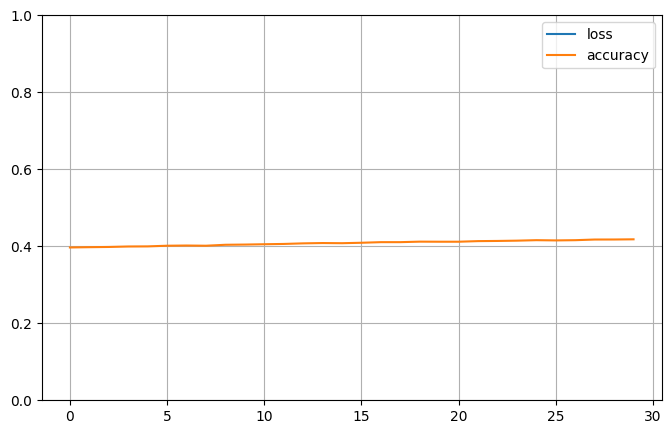

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.5134 - accuracy: 0.4164
test loss, test acc: [1.5133863687515259, 0.4163599908351898]


In [13]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[3003  765   96    2  330  155  139 3513 1940   57]
 [1230 1853  278   11  971  523  412 2086 2484  152]
 [ 173  674 1428  182 2286 1666 1388  215 1202  786]
 [   1    0   29 8716   77   67  109    0    7  994]
 [ 206  655  603  153 3380 1251 1110  244 1253 1145]
 [ 137  563  695  223 2026 2792 1475  196 1078  815]
 [ 121  506  633  212 1911 1473 2974  173 1090  907]
 [1251  594   80    0  262  104  120 6090 1461   38]
 [1133  907  222   11  941  413  393 2138 3629  213]
 [   7   23   72  935  502  159  344   10  177 7771]]
              precision    recall  f1-score   support

           0       0.41      0.30      0.35     10000
           1       0.28      0.19      0.22     10000
           2       0.35      0.14      0.20     10000
           3       0.83      0.87      0.85     10000
           4       0.27      0.34      0.30     10000
           5       0.32      0.28      0.30     10000
           6       0.35      0.3

Test Accuracy:0.41636


Text(0.5, 1.0, 'Accuracy:0.416')

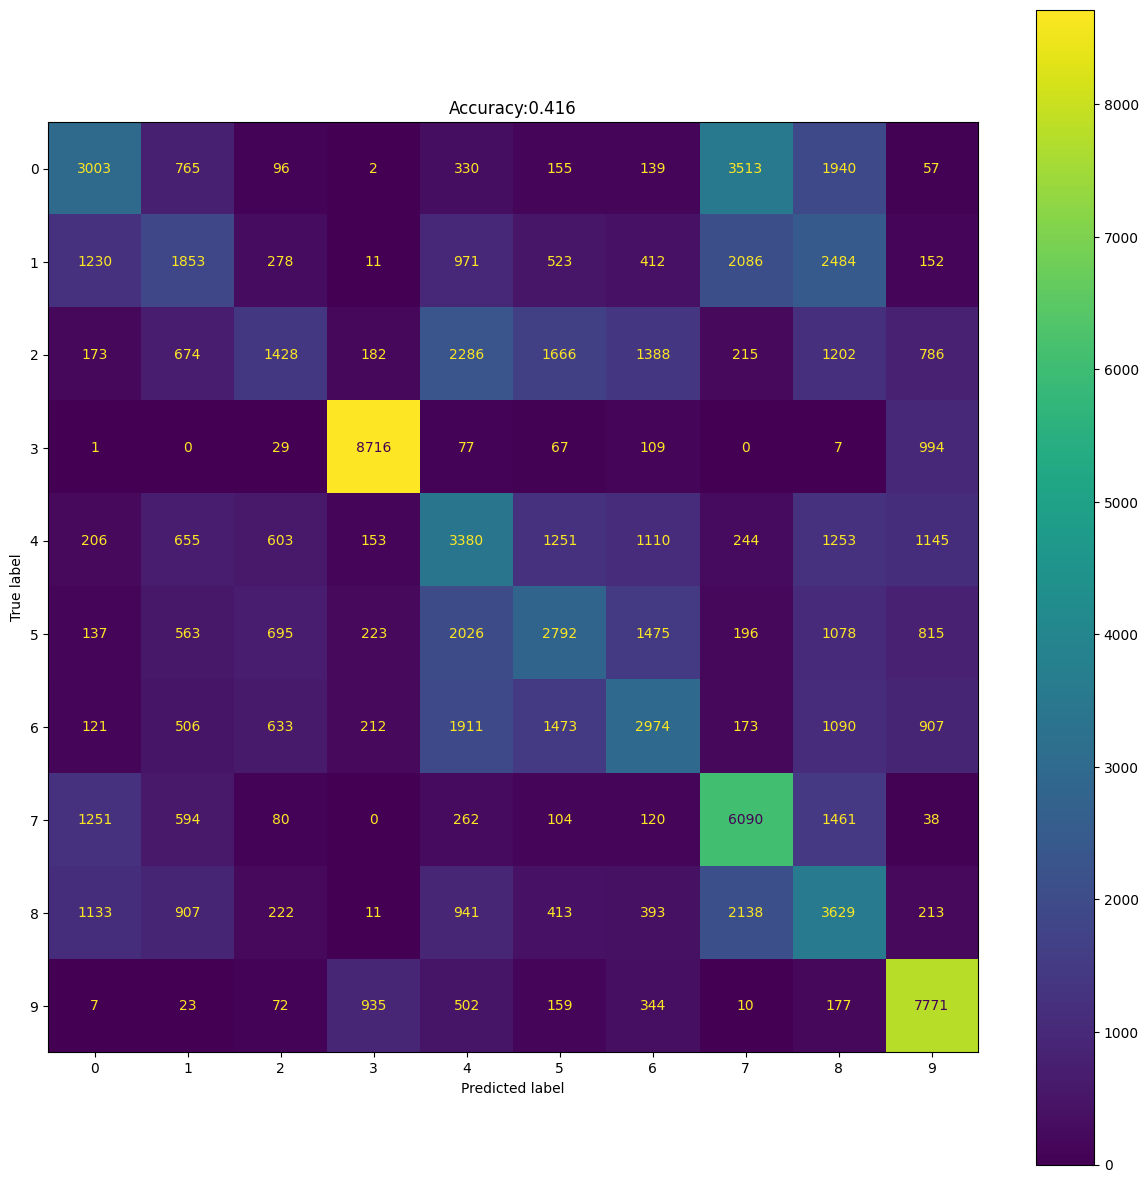

In [14]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(iii) model

Cross-model Validation without training

In [15]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 5.3361 - accuracy: 0.0969
test loss, test acc: [5.336120128631592, 0.0968799963593483]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[ 767 1023 1539 1736  677 1273  861  724  789  611]
 [ 956 1117 1401 1497  865 1475  809  685  607  588]
 [ 795 2360 1071  647  559  886 1010 1052  667  953]
 [1864  402  565 1845  911  647 1225 1609  287  645]
 [1136  929  959 1602 1099  826 1171  720  959  599]
 [1018 1360  881  815 1158  875 1207 1190  771  725]
 [ 819 1615 1199  964 1144  728  765  983  900  883]
 [ 728  987 1639 1888  797 1315  807  505  736  598]
 [ 715 1246 1391 1199  829 1161 1148  434  871 1006]
 [ 943  973  795  919 1800  718 1788  836  455  773]]
              precision    recall  f1-score   support

           0       0.08      0.08      0.08     10000
           1       0.09      0.11      0.10     10000
           2       0.09      0.11      0.10     10000
           3       0.14      0.18      0.16     10000
           4       0.11      0.11      0.11     10000
           5       0.09      0.09      0.09     10000
           6       0.07      0.0

Test Accuracy:0.09688


Text(0.5, 1.0, 'Accuracy:0.097')

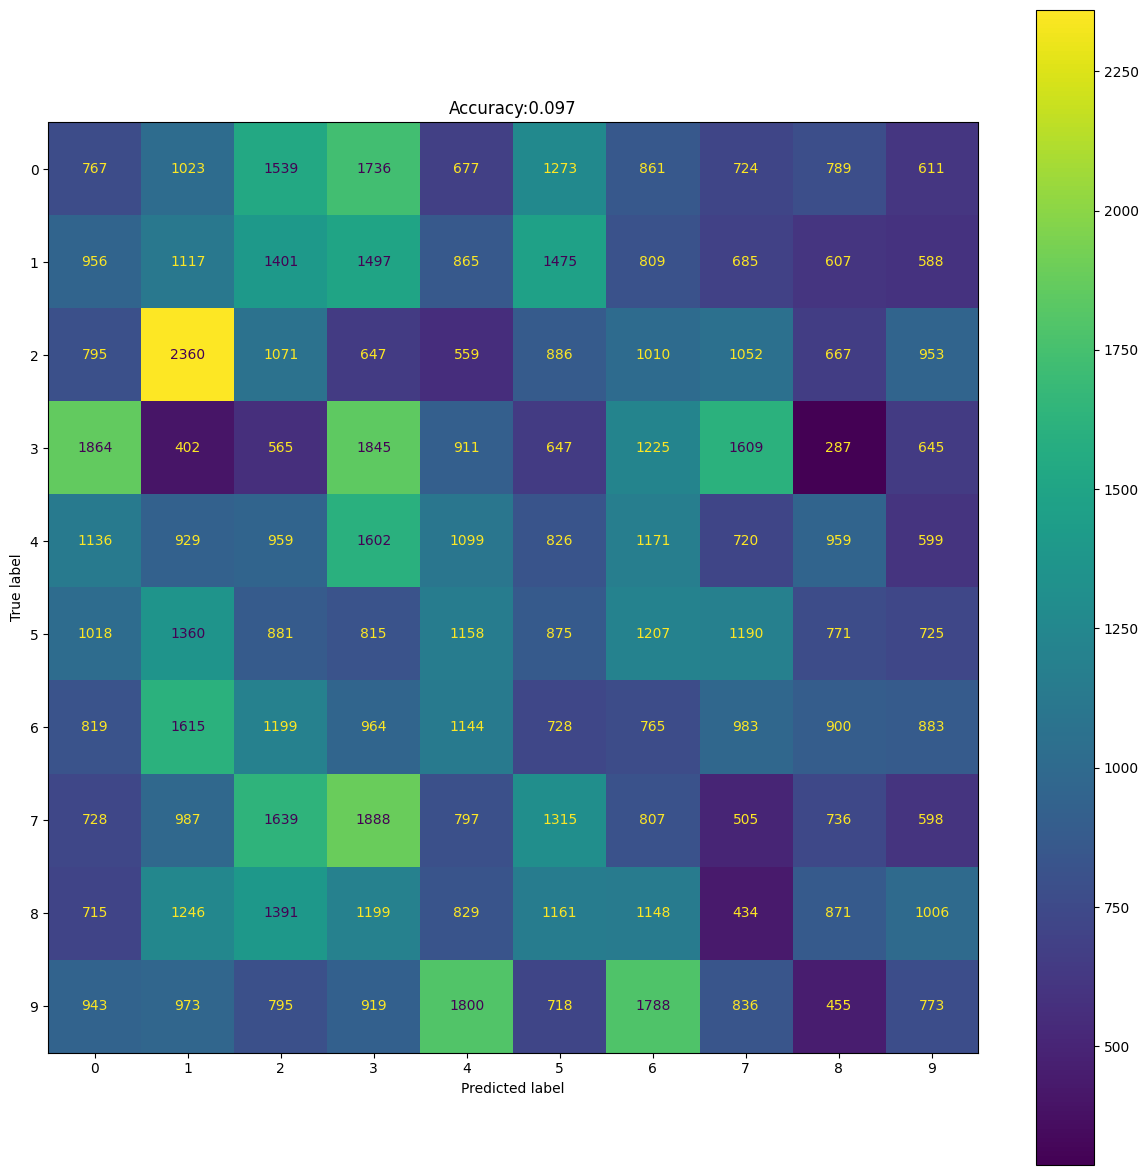

In [18]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [19]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 18s 5ms/step - loss: 4.0773 - accuracy: 0.1053
Epoch 2/30
3125/3125 [==============================] - 17s 5ms/step - loss: 2.6287 - accuracy: 0.1432
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2527 - accuracy: 0.1836
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1670 - accuracy: 0.2047
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.1381 - accuracy: 0.2160
Epoch 6/30
3125/3125 [==============================] - 11s 4ms/step - loss: 2.1238 - accuracy: 0.2240
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.1145 - accuracy: 0.2311
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.1077 - accuracy: 0.2343
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.1014 - accuracy: 0.2386
Epoch 10/30
3125/3125 [==============================] - 14s 4ms/step - l

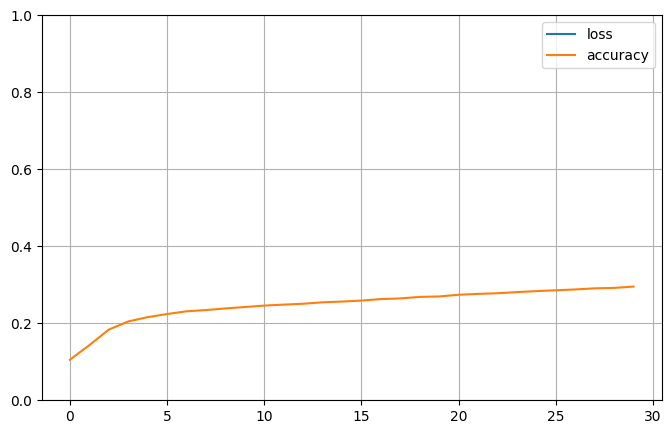

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 2.0066 - accuracy: 0.2967
test loss, test acc: [2.0065672397613525, 0.29666000604629517]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[2035  329  981  757  757  568  996 1949  994  634]
 [ 932  739 1032  841  652  652 1038 2280 1046  788]
 [ 567  265 3039  573  604 1019 1408  957  857  711]
 [ 272  112  395 7128  287  298  341  415  238  514]
 [ 642  196  806 1021 1801 1007 1180 1421  787 1139]
 [ 509  208 1292  906  900 1959 1445  869  765 1147]
 [ 644  243 1330  623  811  931 2475 1017  925 1001]
 [ 786  358  798  606  765  471  879 3621 1103  613]
 [ 682  270 1080  497  726  589 1194 1879 2159  924]
 [ 368  194  686  796  584  505  856  620  681 4710]]
              precision    recall  f1-score   support

           0       0.27      0.20      0.23     10000
           1       0.25      0.07      0.11     10000
           2       0.27      0.30      0.28     10000
           3       0.52      0.71      0.60     10000
           4       0.23      0.18      0.20     10000
           5       0.24      0.20      0.22     10000
           6       0.21      0.2

Test Accuracy:0.29666


Text(0.5, 1.0, 'Accuracy:0.297')

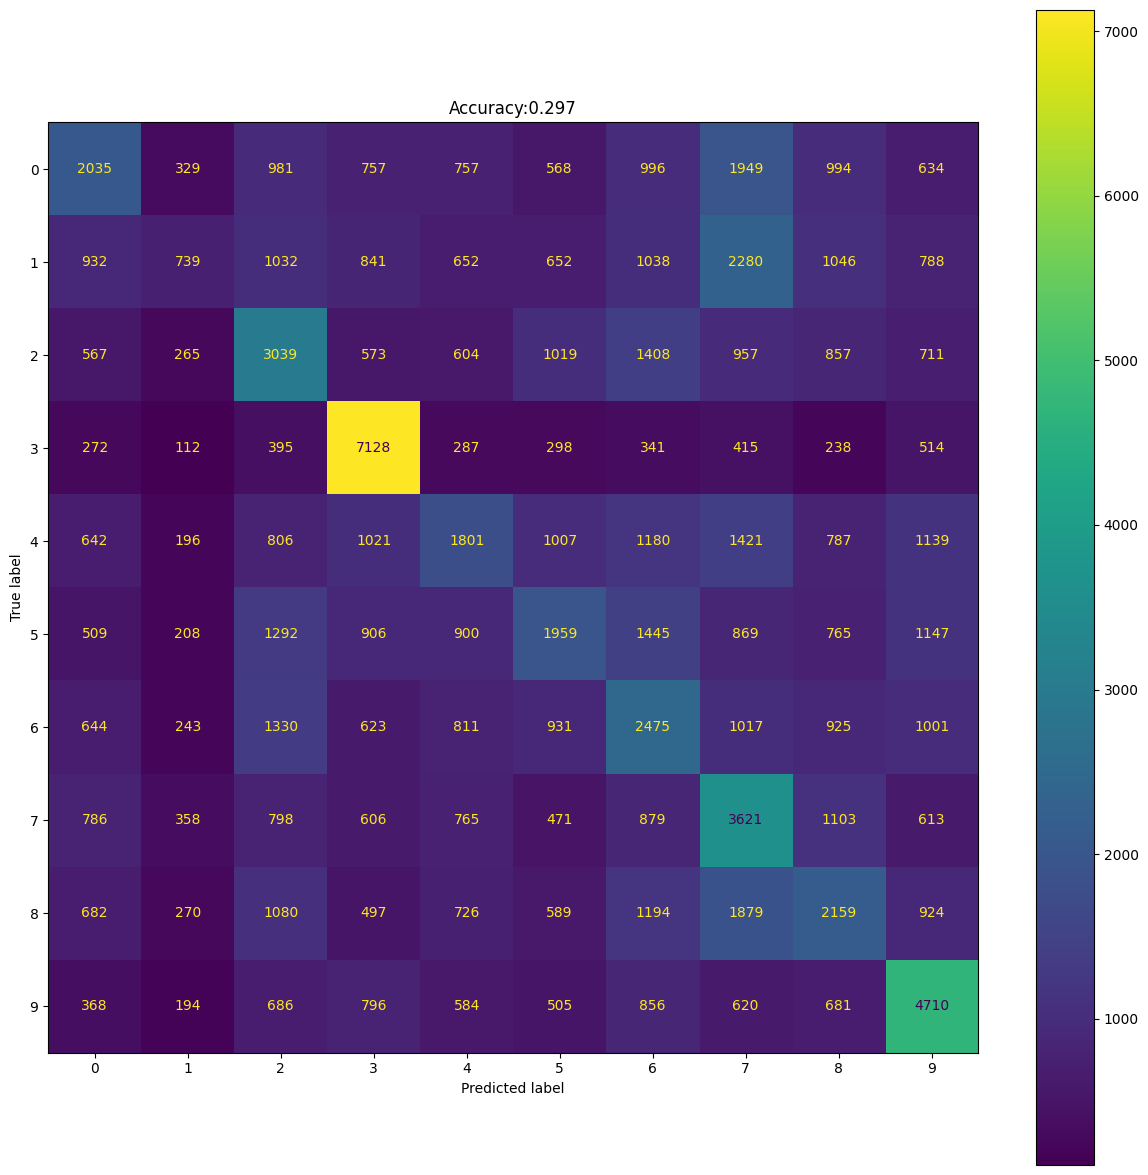

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(iv) model

Cross-model Validation without training

In [25]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iv)_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [26]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 7.2291 - accuracy: 0.0756
test loss, test acc: [7.229069232940674, 0.07558000087738037]


In [27]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[  56   37  548 1740  286 1889  553  159 3176 1556]
 [  95  136 1256 2299  543 1465  365  217 1590 2034]
 [1154  783  803  477  886 1388 1396 1847  322  944]
 [1637 2945 1661   98 1485  222  545 1212   16  179]
 [ 898  896 1370  533 1154 1070 1130 1450  457 1042]
 [ 926 1253 1783  531 1116  894 1732  880  265  620]
 [1352  826 1637  677  530 1242 1908  754  265  809]
 [  65   21  649 1666  168 1680  328   97 3914 1412]
 [  83   86  864 1677  577 1725  468  225 2288 2007]
 [1311 1188 1300  301  835 1113 2753  960  115  124]]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01     10000
           1       0.02      0.01      0.01     10000
           2       0.07      0.08      0.07     10000
           3       0.01      0.01      0.01     10000
           4       0.15      0.12      0.13     10000
           5       0.07      0.09      0.08     10000
           6       0.17      0.1

Test Accuracy:0.07558


Text(0.5, 1.0, 'Accuracy:0.076')

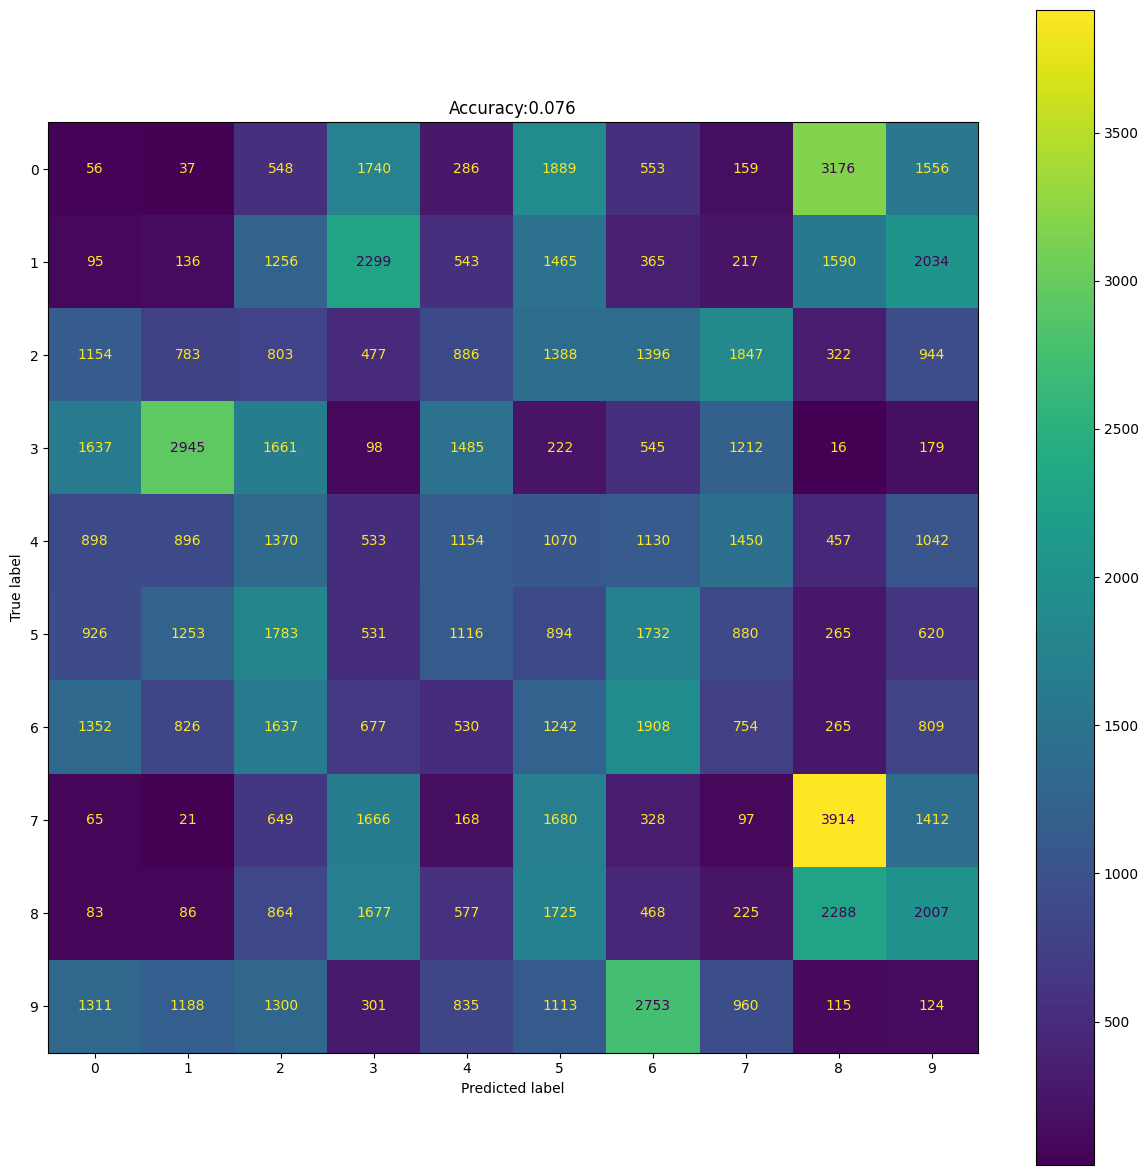

In [28]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [29]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [30]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 3.9226 - accuracy: 0.1264
Epoch 2/30
3125/3125 [==============================] - 14s 5ms/step - loss: 2.0895 - accuracy: 0.2318
Epoch 3/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.8375 - accuracy: 0.2877
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7736 - accuracy: 0.3073
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7485 - accuracy: 0.3176
Epoch 6/30
3125/3125 [==============================] - 11s 4ms/step - loss: 1.7360 - accuracy: 0.3228
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7281 - accuracy: 0.3277
Epoch 8/30
3125/3125 [==============================] - 11s 4ms/step - loss: 1.7224 - accuracy: 0.3295
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7179 - accuracy: 0.3316
Epoch 10/30
3125/3125 [==============================] - 11s 4ms/step - l

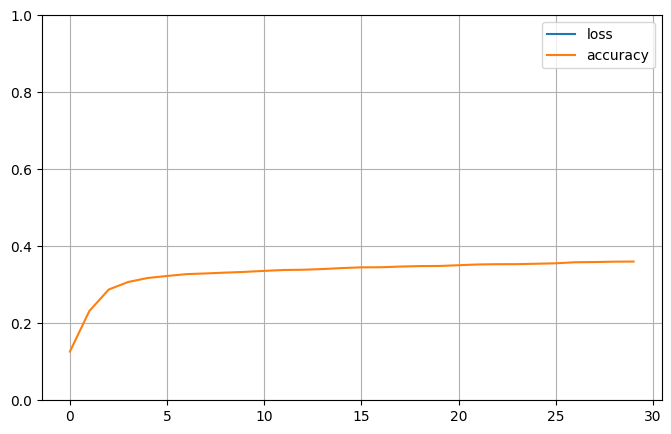

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [32]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.6665 - accuracy: 0.3608
test loss, test acc: [1.6665387153625488, 0.3608100116252899]


In [33]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[3547  606  354   14  202  143  447 1984 2592  111]
 [1629 1913  389   50  462  371  742 1077 3230  137]
 [ 364  205 3065  754 1027  733 1745   53  843 1211]
 [   1   22  269 7533  385  318  477    3   53  939]
 [ 297  296 1863  958 1714 1033 1543   63 1182 1051]
 [ 200  229 1194 1263  850 1760 1980   43  710 1771]
 [ 352  302 1360  711  657 1005 3406   95  750 1362]
 [2612  559  203    4  137   99  331 3721 2253   81]
 [1896  851  457   33  427  253  586 1257 4103  137]
 [ 103   55  794 1302  428  710 1056   21  212 5319]]
              precision    recall  f1-score   support

           0       0.32      0.35      0.34     10000
           1       0.38      0.19      0.25     10000
           2       0.31      0.31      0.31     10000
           3       0.60      0.75      0.67     10000
           4       0.27      0.17      0.21     10000
           5       0.27      0.18      0.21     10000
           6       0.28      0.3

Test Accuracy:0.36081


Text(0.5, 1.0, 'Accuracy:0.361')

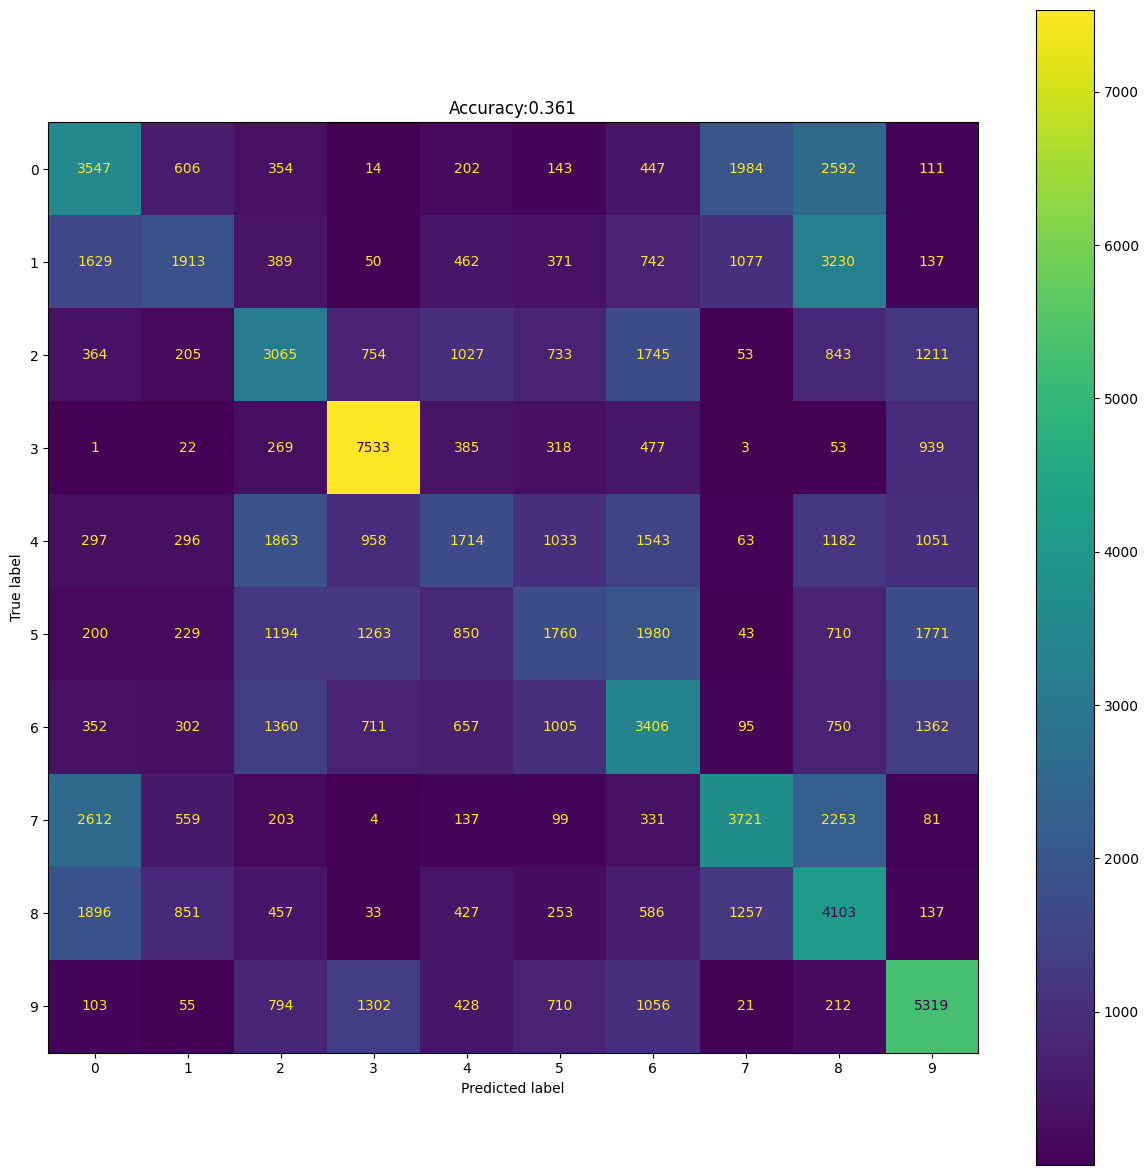

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(v) model

Cross-model Validation without training

In [35]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(v)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [36]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 18.7103 - accuracy: 0.1000
test loss, test acc: [18.71025848388672, 0.10002999752759933]


In [37]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[  12    0    0    0    0    0    2 9986    0    0]
 [  10    0    0    0    0    0    4 9986    0    0]
 [  19    0    0    0    0    0    6 9975    0    0]
 [  36    0    0    0    0    0    1 9963    0    0]
 [  32    0    0    0    0    0   11 9957    0    0]
 [   9    0    0    0    0    0    7 9984    0    0]
 [  57    0    0    0    0    0    9 9934    0    0]
 [  11    0    0    0    0    0    7 9982    0    0]
 [  12    0    0    0    0    0    2 9986    0    0]
 [   5    0    0    1    0    0   28 9966    0    0]]
              precision    recall  f1-score   support

           0       0.06      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.12      0.0

Test Accuracy:0.10003


Text(0.5, 1.0, 'Accuracy:0.100')

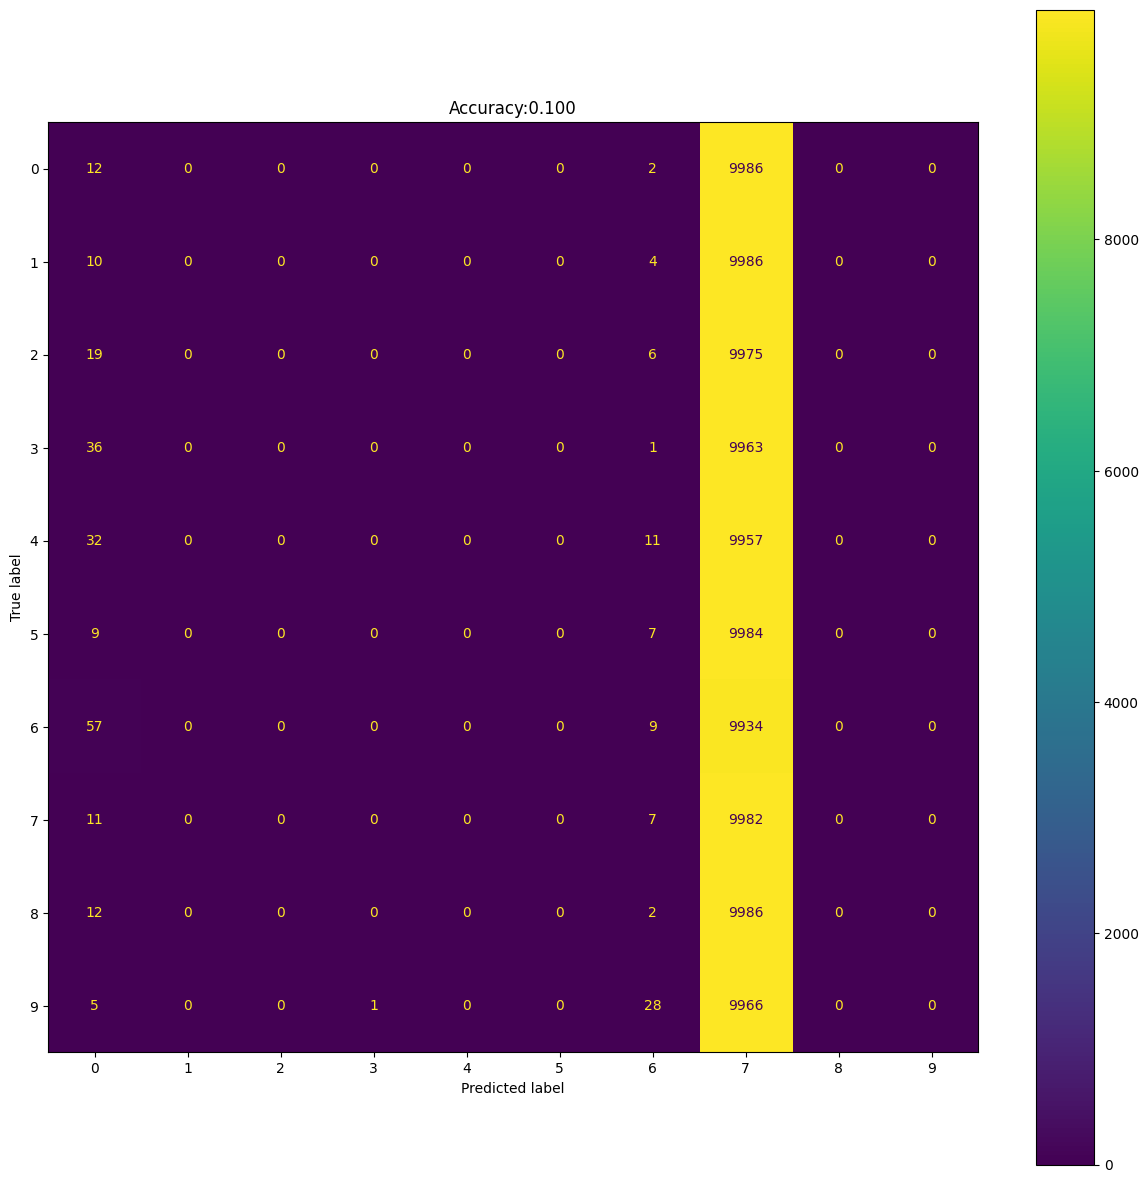

In [38]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [39]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [40]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 20s 6ms/step - loss: 3.0602 - accuracy: 0.1310
Epoch 2/30
3125/3125 [==============================] - 17s 5ms/step - loss: 2.1472 - accuracy: 0.2305
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.0348 - accuracy: 0.2514
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.9926 - accuracy: 0.2610
Epoch 5/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.9682 - accuracy: 0.2666
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.9528 - accuracy: 0.2715
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.9413 - accuracy: 0.2754
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.9324 - accuracy: 0.2779
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.9256 - accuracy: 0.2801
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

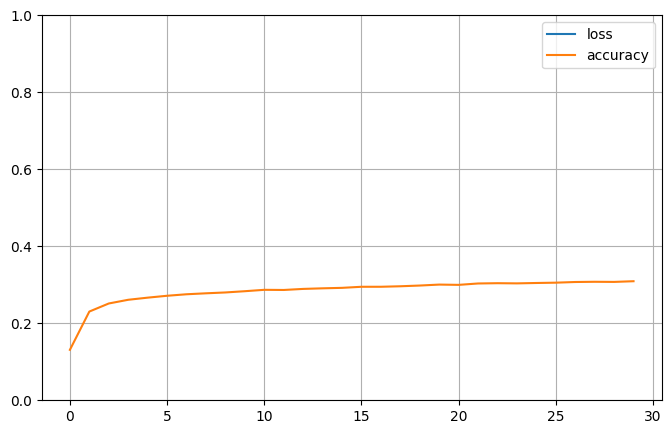

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 1.8620 - accuracy: 0.3109
test loss, test acc: [1.8620402812957764, 0.31092000007629395]


In [43]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[1495  288  310  153  126 1507 1664 3016    2 1439]
 [1173  481  472  124  124 1500 1892 2521    1 1712]
 [ 708  316  826  182  241 2165 2103 1480    2 1977]
 [   1    0    6 9783    7   37  112   41    0   13]
 [ 541  218  441  212  470 2183 2559 1467    0 1909]
 [ 668  185  390  193  196 2865 1717 1963    2 1821]
 [ 567  257  393  317  216 1650 3291 1839    0 1470]
 [ 967  264  241  193   78 1440 1578 4143    4 1092]
 [ 783  268  500  207  153 1844 1860 2476    3 1906]
 [ 155   67  110   99  100  670  481  583    0 7735]]
              precision    recall  f1-score   support

           0       0.21      0.15      0.18     10000
           1       0.21      0.05      0.08     10000
           2       0.22      0.08      0.12     10000
           3       0.85      0.98      0.91     10000
           4       0.27      0.05      0.08     10000
           5       0.18      0.29      0.22     10000
           6       0.19      0.3

Test Accuracy:0.31092


Text(0.5, 1.0, 'Accuracy:0.311')

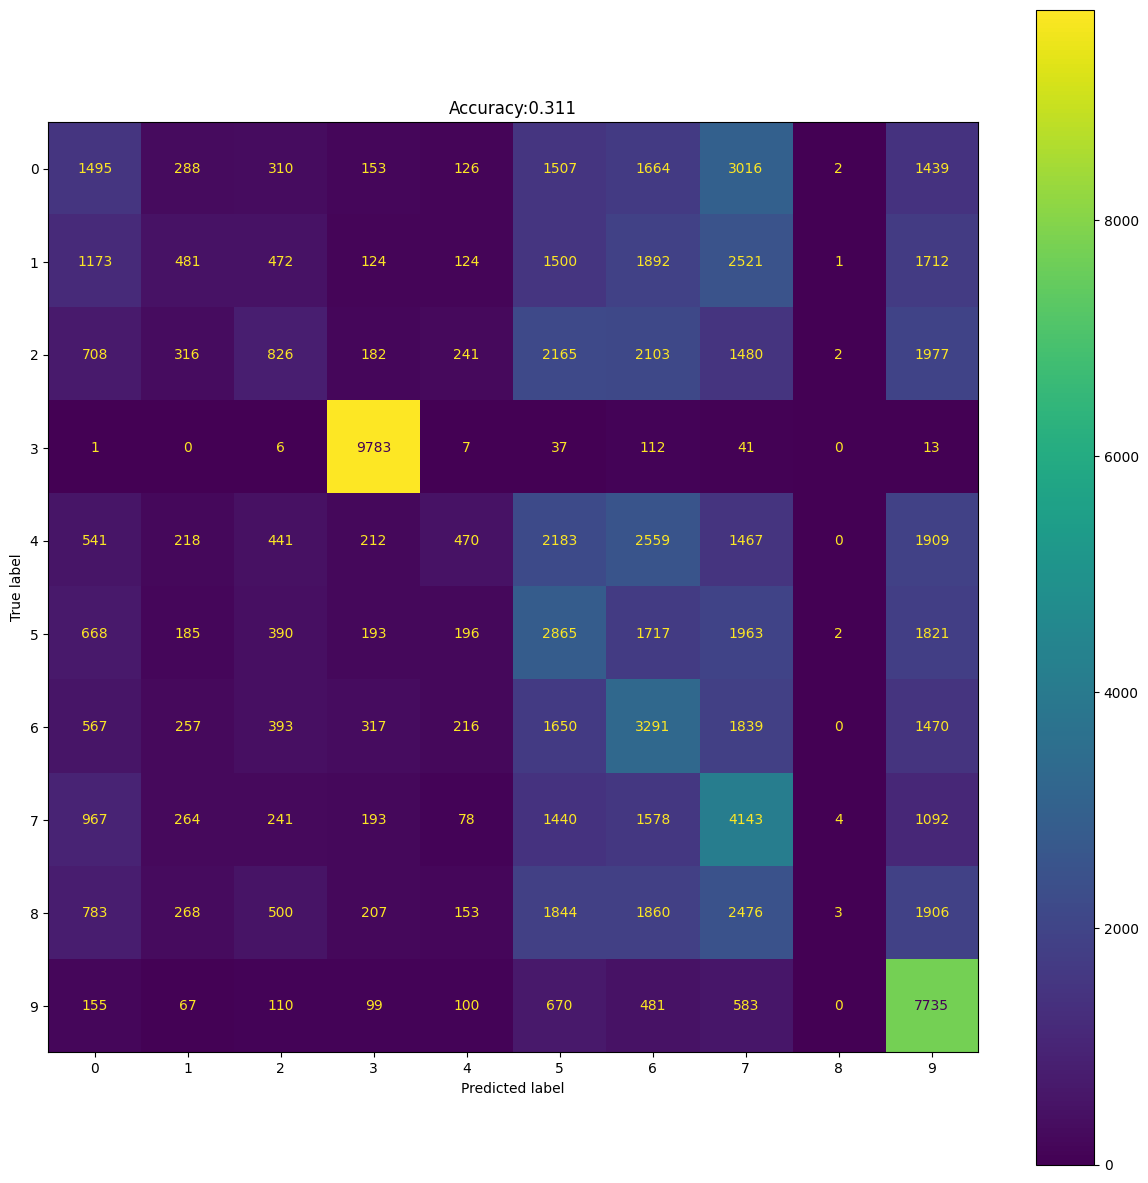

In [44]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')